In [161]:
import matplotlib.font_manager as fm

# 시스템에서 사용 가능한 모든 폰트 출력
font_list = [f.name for f in fm.fontManager.ttflist]
print(font_list)

['cmtt10', 'STIXGeneral', 'STIXSizeOneSym', 'DejaVu Sans Mono', 'DejaVu Sans', 'DejaVu Serif Display', 'STIXNonUnicode', 'cmss10', 'STIXNonUnicode', 'DejaVu Sans', 'STIXGeneral', 'STIXSizeOneSym', 'cmr10', 'DejaVu Serif', 'STIXGeneral', 'DejaVu Sans Mono', 'cmb10', 'STIXNonUnicode', 'DejaVu Serif', 'STIXSizeTwoSym', 'DejaVu Sans Mono', 'STIXSizeFiveSym', 'STIXSizeThreeSym', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'DejaVu Sans', 'STIXSizeThreeSym', 'STIXGeneral', 'STIXNonUnicode', 'STIXSizeTwoSym', 'cmmi10', 'DejaVu Serif', 'STIXSizeFourSym', 'cmex10', 'cmsy10', 'DejaVu Serif', 'DejaVu Sans', 'Corbel', 'Microsoft JhengHei', 'HCR Dotum', 'Verdana', 'NanumMyeongjo', 'Bodoni MT', 'Georgia', 'Bodoni MT', 'Brush Script MT', 'Franklin Gothic Medium', 'Informal Roman', 'Corbel', 'Segoe UI', 'Perpetua Titling MT', 'Book Antiqua', 'Segoe UI', 'Lucida Sans Unicode', 'Han Santteut Dotum', 'Lucida Fax', 'Trebuchet MS', 'Goudy Old Style', 'STCaiyun', 'Batang', 'Monotype Corsiva

In [162]:
import matplotlib.pyplot as plt
import platform

# 운영 체제에 따라 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':  # macOS
    plt.rc('font', family='AppleGothic')
else:  # Linux (예: 구글 코랩)
    plt.rc('font', family='NanumGothic')

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# Dataset Info.

## train.csv [파일]
ID : 샘플별 고유 ID
제조사, 모델, 차량상태, 배터리용량, 구동방식, 주행거리(km), 보증기간(년), 사고이력, 연식(년) , 가격(백만원)


## test.csv [파일]
ID : 샘플별 고유 ID
제조사
, 모델, 차량상태, 배터리용량, 구동방식, 주행거리(km), 보증기간(년), 사고이력, 연식(년) 


sample_submission.csv [파일] - 제출 양식
ID : 샘플 별 고유 ID
가격(백만원)


In [163]:
import pandas as pd
import matplotlib.pyplot as plt

In [164]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [165]:
df_train.sample(1)

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
6033,TRAIN_6033,K사,EV6,Brand New,90.0,FWD,9599,9,No,0,41.45


In [166]:
df_test.sample(1)

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년)
178,TEST_178,A사,Q4eT,Nearly New,72.548,AWD,10801,5,No,1


In [167]:
cols = list(df_train.columns)
print(cols)

['ID', '제조사', '모델', '차량상태', '배터리용량', '구동방식', '주행거리(km)', '보증기간(년)', '사고이력', '연식(년)', '가격(백만원)']


In [168]:
for i in range(1, len(cols)):
    print(f'"{cols[i]}"의 value unique : {len(df_train[cols[i]].unique())}')

"제조사"의 value unique : 7
"모델"의 value unique : 21
"차량상태"의 value unique : 3
"배터리용량"의 value unique : 195
"구동방식"의 value unique : 3
"주행거리(km)"의 value unique : 6916
"보증기간(년)"의 value unique : 11
"사고이력"의 value unique : 2
"연식(년)"의 value unique : 3
"가격(백만원)"의 value unique : 3950


In [169]:
for i in range(1, len(cols)-1):
    print(f'"{cols[i]}"의 value unique : {len(df_test[cols[i]].unique())}')

"제조사"의 value unique : 7
"모델"의 value unique : 21
"차량상태"의 value unique : 3
"배터리용량"의 value unique : 93
"구동방식"의 value unique : 3
"주행거리(km)"의 value unique : 842
"보증기간(년)"의 value unique : 11
"사고이력"의 value unique : 2
"연식(년)"의 value unique : 3


In [170]:
print(df_train['보증기간(년)'].sort_values().unique(), df_test['보증기간(년)'].sort_values().unique())

[ 0  1  2  3  4  5  6  7  8  9 10] [ 0  1  2  3  4  5  6  7  8  9 10]


In [171]:
df_train['배터리용량'].mean()

69.39718679481821

In [172]:
df_train['배터리용량'] = df_train['배터리용량'].fillna(df_train['배터리용량'].mean())

In [173]:
df_train.isnull().sum()

ID          0
제조사         0
모델          0
차량상태        0
배터리용량       0
구동방식        0
주행거리(km)    0
보증기간(년)     0
사고이력        0
연식(년)       0
가격(백만원)     0
dtype: int64

train, test 비교 결과 : 제조사, 모델, 차량상태, 구동방식, 보증기간, 사고이력에서는 나타나는 값의 종류가 동일


'ID', '제조사', '모델', '차량상태', '배터리용량', '구동방식', '주행거리(km)', '보증기간(년)', '사고이력', '연식(년)', '가격(백만원)'

### 가격에 직접적인 영향(스케일링_연속값 0 ~ 1) : 차량상태, 주행거리, 보증기간, 사고이력, 연식

### 가격에 간접적인 영향(원-핫 인코딩) : 제조사==모델?, 구동방식

원핫인코딩 : 각 레이블마다 1을 부여하면서 쪼갬

라벨인코딩 : 해당 열의 값에 0부터 순서대로 번호 부여

"제조사"의 value unique : 7

"모델"의 value unique : 21

"차량상태"의 value unique : 3

"배터리용량"의 value unique : 195

"구동방식"의 value unique : 3

"주행거리(km)"의 value unique : 6916

"보증기간(년)"의 value unique : 11

"사고이력"의 value unique : 2

"연식(년)"의 value unique : 3

"가격(백만원)"의 value unique : 3950

In [174]:
df_train = df_train.rename(columns={
    '제조사':'Company', # 안씀
    '모델': 'Vehicle_Model', # 원핫(21)
    '차량상태':'Status', # 라벨(3)
    '배터리용량':'Battery', # raw 사용
    '구동방식': 'Driving_Method', # 원핫(11)
    '주행거리(km)':'Distance', # raw 사용
    '보증기간(년)':'Warranty', # 원핫(11)
    '사고이력':'Accident', # 라벨(2)
    '연식(년)':'Year', #라벨(3)
    '가격(백만원)':'Price'}) # 예측값 

In [175]:
df_train.columns

Index(['ID', 'Company', 'Vehicle_Model', 'Status', 'Battery', 'Driving_Method',
       'Distance', 'Warranty', 'Accident', 'Year', 'Price'],
      dtype='object')

In [176]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

encoder = OneHotEncoder(sparse_output=False)

encoded_data = encoder.fit_transform(df_train[['Vehicle_Model', 'Driving_Method','Warranty','Status']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Vehicle_Model', 'Driving_Method','Warranty','Status']))

# 기존 데이터프레임에 원핫 인코딩된 데이터 추가
df_train = pd.concat([df_train, encoded_df], axis=1)
df_train.drop(['Vehicle_Model','Driving_Method','Warranty','Status'], axis=1, inplace = True)
df_train.columns

Index(['ID', 'Company', 'Battery', 'Distance', 'Accident', 'Year', 'Price',
       'Vehicle_Model_EV6', 'Vehicle_Model_ID4', 'Vehicle_Model_ION5',
       'Vehicle_Model_ION6', 'Vehicle_Model_IONIQ', 'Vehicle_Model_KNE',
       'Vehicle_Model_M3', 'Vehicle_Model_MS', 'Vehicle_Model_MX',
       'Vehicle_Model_MY', 'Vehicle_Model_Niro', 'Vehicle_Model_Q4eT',
       'Vehicle_Model_RSeTGT', 'Vehicle_Model_Soul', 'Vehicle_Model_Tay',
       'Vehicle_Model_TayCT', 'Vehicle_Model_TayGTS', 'Vehicle_Model_eT',
       'Vehicle_Model_i3', 'Vehicle_Model_i5', 'Vehicle_Model_iX',
       'Driving_Method_AWD', 'Driving_Method_FWD', 'Driving_Method_RWD',
       'Warranty_0', 'Warranty_1', 'Warranty_2', 'Warranty_3', 'Warranty_4',
       'Warranty_5', 'Warranty_6', 'Warranty_7', 'Warranty_8', 'Warranty_9',
       'Warranty_10', 'Status_Brand New', 'Status_Nearly New',
       'Status_Pre-Owned'],
      dtype='object')

In [177]:
mapping = {'No' : 1, 'Yes' : -1}

df_train['Accident'] = df_train['Accident'].map(mapping)
df_train.sample(3)

,ID,Company,Battery,Distance,Accident,Year,Price,Vehicle_Model_EV6,Vehicle_Model_ID4,Vehicle_Model_ION5,...,Warranty_4,Warranty_5,Warranty_6,Warranty_7,Warranty_8,Warranty_9,Warranty_10,Status_Brand New,Status_Nearly New,Status_Pre-Owned
6672,TRAIN_6672,B사,69.397187,3007,1,0,24.14,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2279,TRAIN_2279,T사,75.145000,144807,-1,0,80.53,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1448,TRAIN_1448,H사,69.397187,651,1,0,21.92,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [178]:
df_train.drop(['ID','Company'], axis=1, inplace = True)

In [179]:
df_train.sample(5)

,Battery,Distance,Accident,Year,Price,Vehicle_Model_EV6,Vehicle_Model_ID4,Vehicle_Model_ION5,Vehicle_Model_ION6,Vehicle_Model_IONIQ,...,Warranty_4,Warranty_5,Warranty_6,Warranty_7,Warranty_8,Warranty_9,Warranty_10,Status_Brand New,Status_Nearly New,Status_Pre-Owned
3343,51.940000,175220,1,0,50.88,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7234,69.397187,7662,1,0,38.58,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3833,91.200000,2584,1,0,65.25,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6757,69.397187,1079,1,0,120.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16,76.093000,49335,1,0,130.61,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [181]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
df_train[['Battery', 'Distance']] = s.fit_transform(df_train[['Battery', 'Distance']])
df_train.sample(3)

,Battery,Distance,Accident,Year,Price,Vehicle_Model_EV6,Vehicle_Model_ID4,Vehicle_Model_ION5,Vehicle_Model_ION6,Vehicle_Model_IONIQ,...,Warranty_4,Warranty_5,Warranty_6,Warranty_7,Warranty_8,Warranty_9,Warranty_10,Status_Brand New,Status_Nearly New,Status_Pre-Owned
3541,-1.429718e+00,2.131489,1,0,74.66,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3746,-1.163848e-15,-0.674144,1,0,40.04,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5849,2.096833e+00,-0.650249,1,0,59.62,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


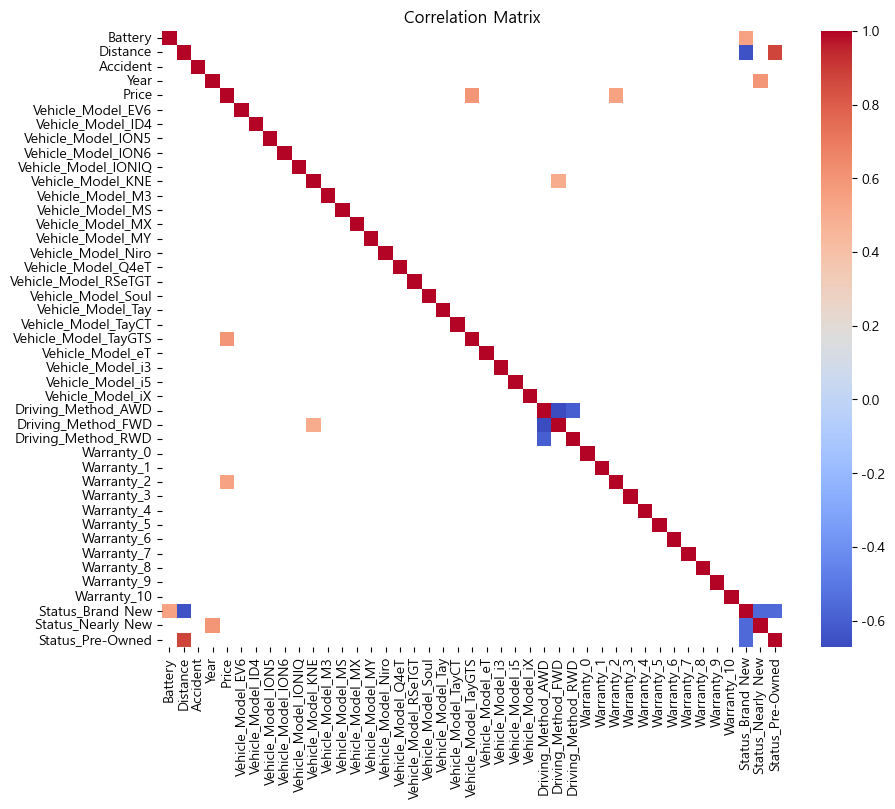

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 계산
correlation_matrix = df_train.corr()

corr_matrix = correlation_matrix[correlation_matrix.abs() > 0.5]

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()